# K-means, DBSCAN, Agglomerative clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
import sklearn.cluster as cluster

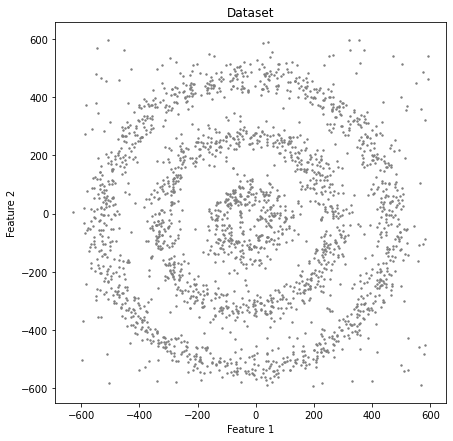

In [ ]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n=100):
    return [(np.cos(2*np.pi/n*x)*r+np.random.normal(-30,30),
             np.sin(2*np.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500,1000))
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df = df.append([(np.random.randint(-600,600),
               np.random.randint(-600,600)) for i in range(300)])

plt.figure(figsize=(7,7))
plt.scatter(df[0], df[1], s=2, color='grey')
plt.title('Dataset',fontsize=12)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
k_means= cluster.KMeans(n_clusters=3, random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=3, random_state=42)

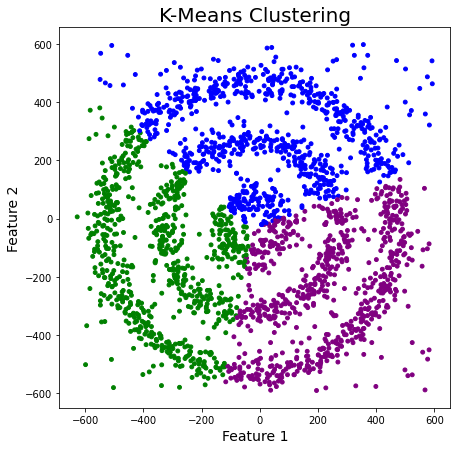

In [ ]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(7, 7))
plt.scatter(df[0], df[1], c=df['KMeans_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
Agg = cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Agg.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=3)

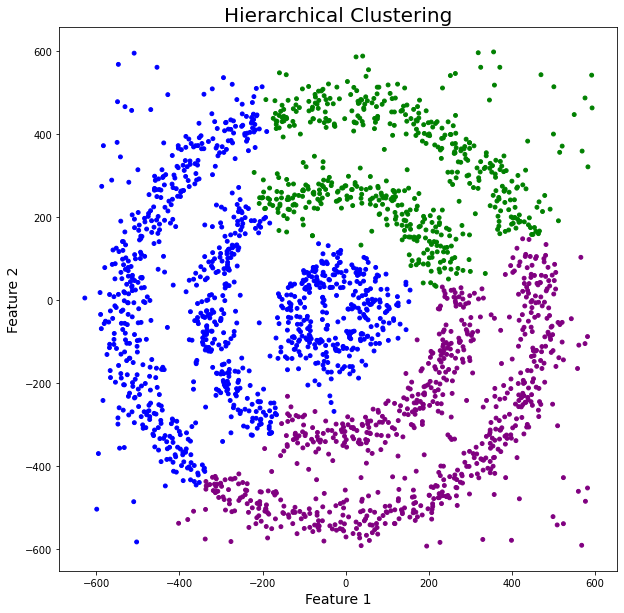

In [ ]:
df['HR_labels']=Agg.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
dbscan = cluster.DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

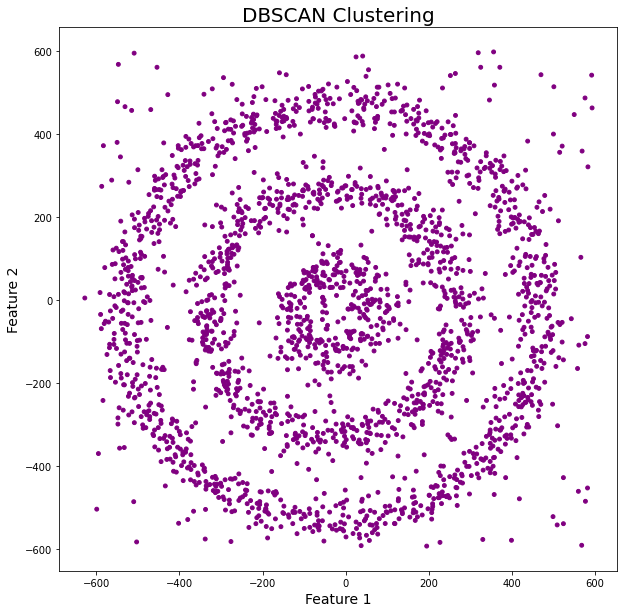

In [ ]:
df['DBSCAN_labels']=dbscan.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

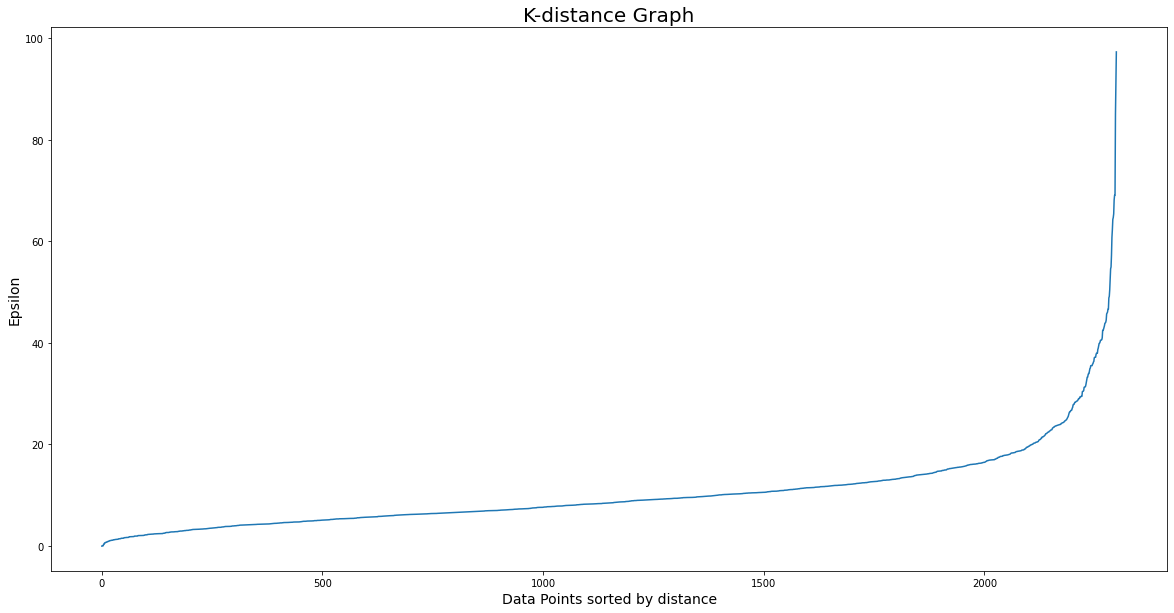

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
dbscan_opt = cluster.DBSCAN(eps=35, min_samples=10)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=35, min_samples=10)

In [ ]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 3    724
 0    649
 4    315
 2    214
 1    203
-1    195
Name: DBSCAN_opt_labels, dtype: int64

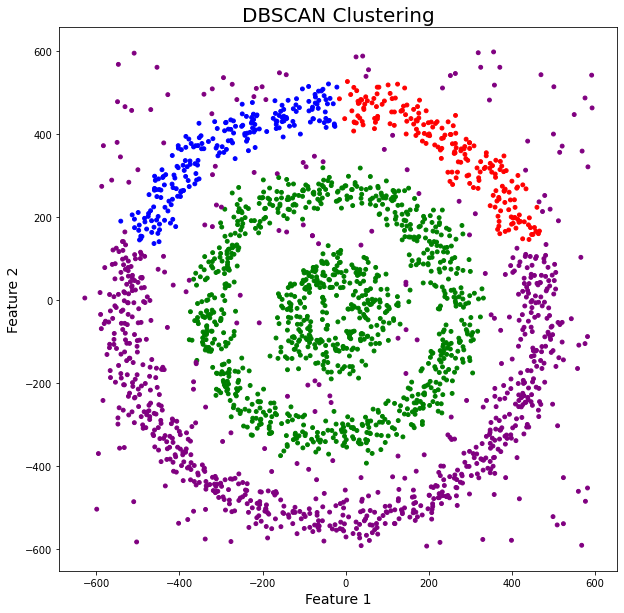

In [ ]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.1 MB/s 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340245 sha256=c53e5bb4d17f991136c9764690aec39f324d6e8044b42badffd0c70cdc69f669
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
import hdbscan
dbscan_opt1 = hdbscan.HDBSCAN(min_samples=6)
dbscan_opt1.fit(df[[0,1]])

HDBSCAN(min_samples=6)

In [ ]:
df['DBSCAN_opt_labels1']=dbscan_opt1.labels_
df['DBSCAN_opt_labels1'].value_counts()

 0    1094
 1     717
 2     314
-1     175
Name: DBSCAN_opt_labels1, dtype: int64

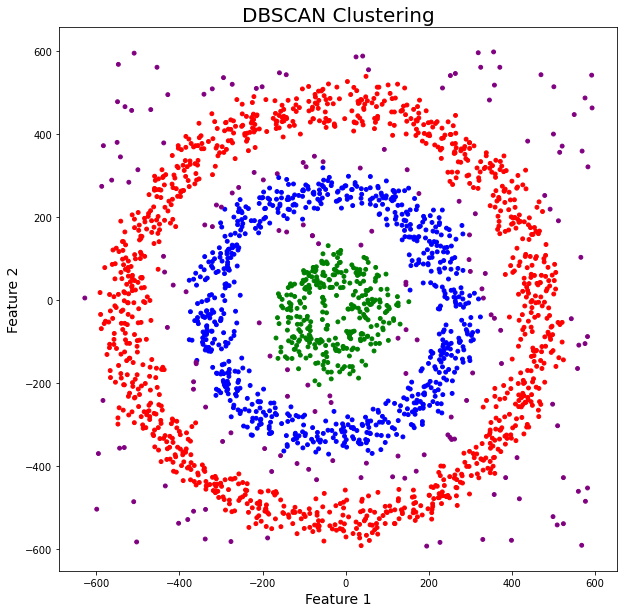

In [ ]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels1'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

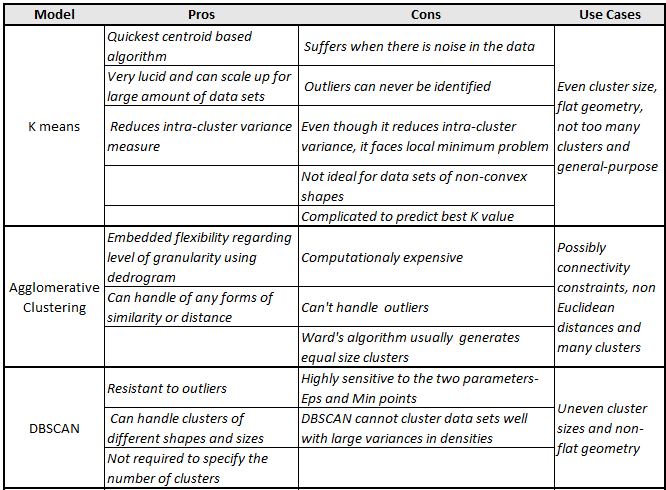